### 神经网络 隐含层+激活函数 拟合 非线性回归

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F

In [2]:
x = torch.unsqueeze(torch.linspace(-3, 3, 10000), dim=1)
y = x.pow(3) + 0.3 * torch.rand(x.size())

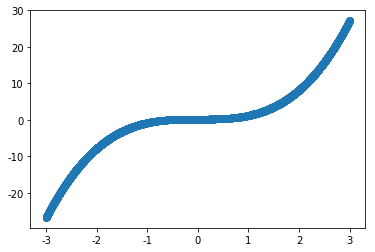

In [3]:
plt.scatter(x.numpy(), y.numpy())

* 激活函数的出现是为了让神经网络可以拟合复杂的非线性函数，激活函数 f 本身是一个非常简单的非线性函数，但只要多个带有激活函数的神经元组合在一起，就具有拟合复杂非线性函数的强大能力！常用的激活函数有 sigmoid, tanh, ReLU 和 Maxout 等
* 输入层 + n * 隐含层 + 输出层; 隐含层神经元是我们进行大部分计算的区域，隐含层约复杂，所能模拟的非线性函数就约复杂，凡是 n >= 2 的神经网络，都可以叫做 深度神经网络

In [6]:
class Net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        # num_hidden 隐含层数量
        super(Net, self).__init__()
        self.hidden = nn.Linear(num_input, num_hidden)
        self.out = nn.Linear(num_hidden, num_output)
    
    def forward(self, x):
        # 使用 ReLU 作为非线性激活函数
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [15]:
inputs = x
target = y
model = Net(inputs.numpy().shape[1], 20, target.numpy().shape[1])

In [17]:
def train(model, inputs, target, epochs, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 200 == 0:
            draw(inputs, target, output, loss)
    return model, loss, output

def draw(inputs, target, output, loss):
    plt.cla()
    plt.scatter(inputs.numpy(), target.numpy())
    plt.plot(inputs.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'loss=%s' % (loss.item()), fontdict={'size':20, 'color':'red'})
    plt.pause(0.05)

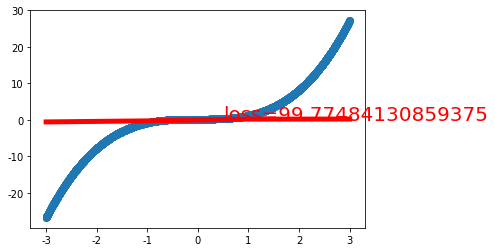

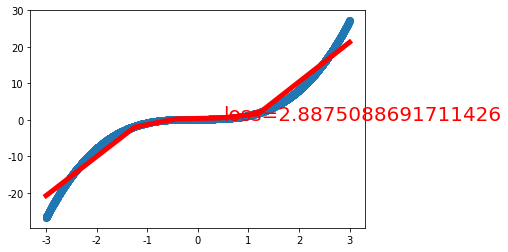

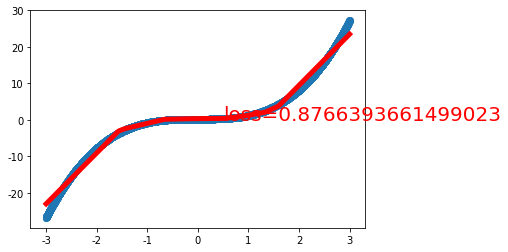

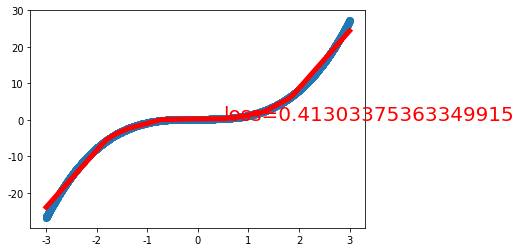

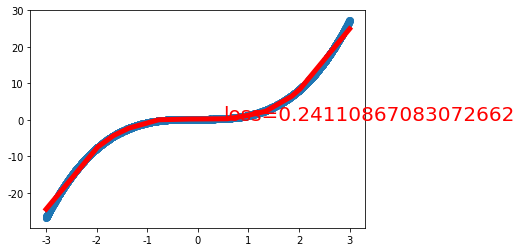

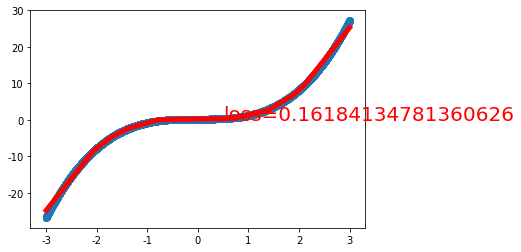

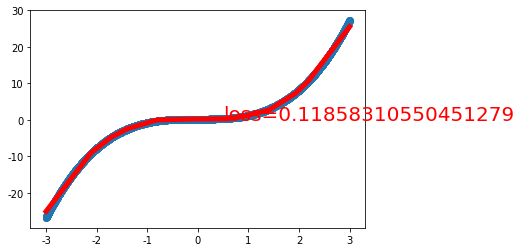

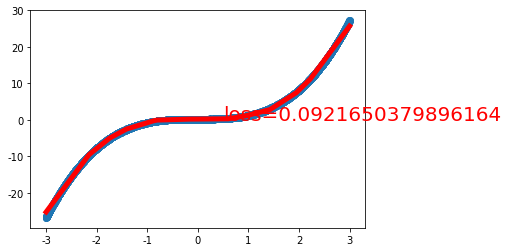

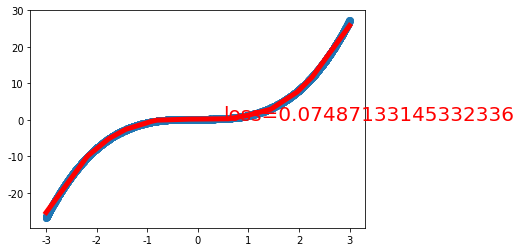

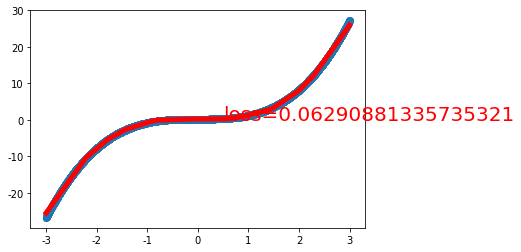

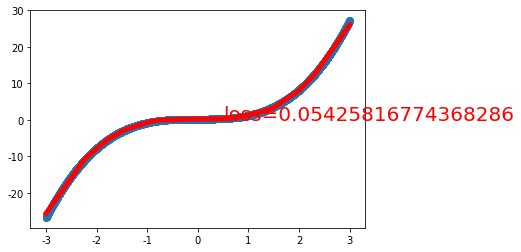

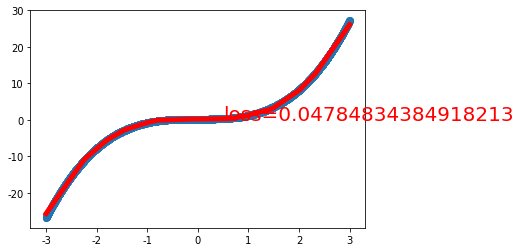

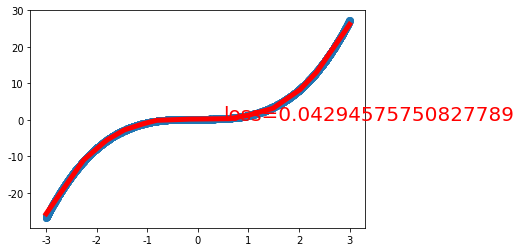

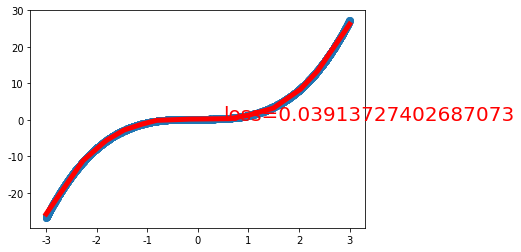

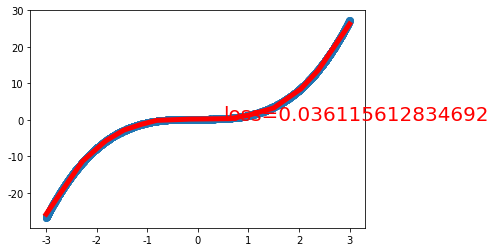

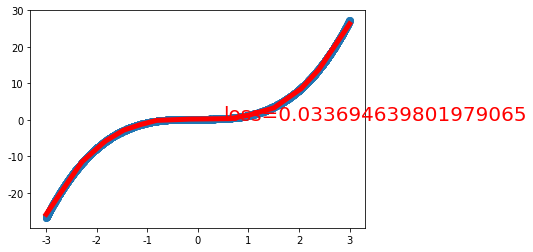

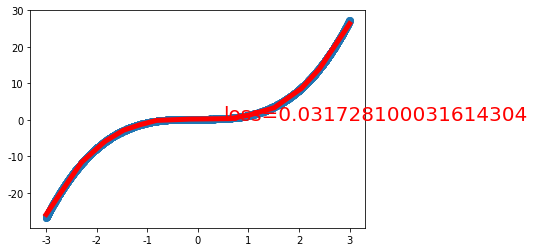

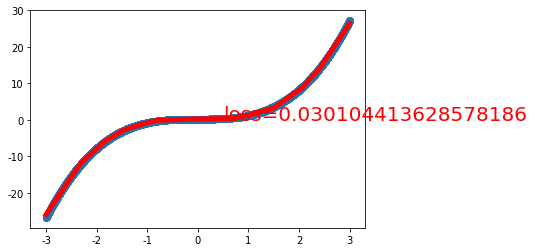

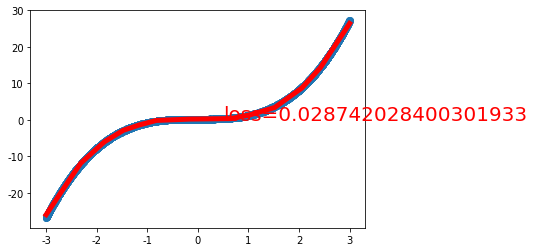

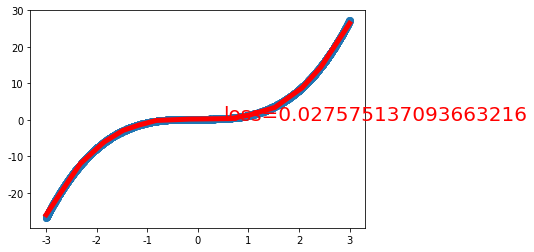

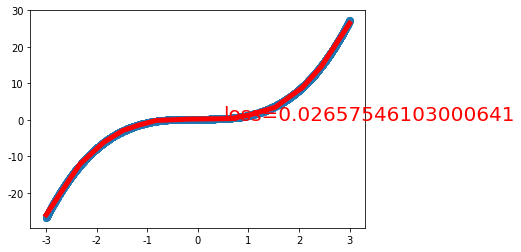

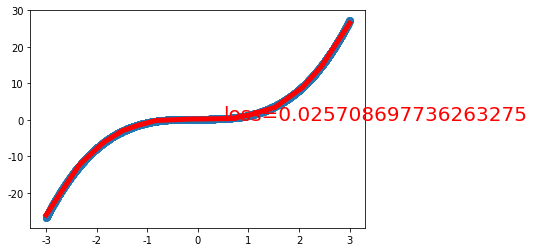

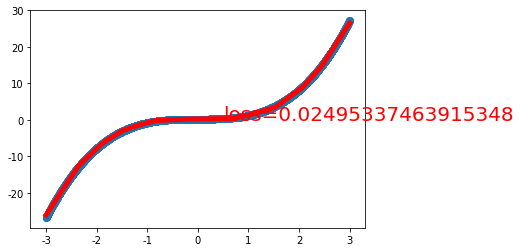

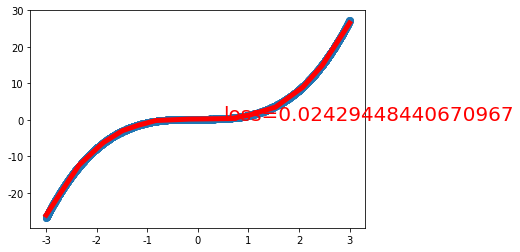

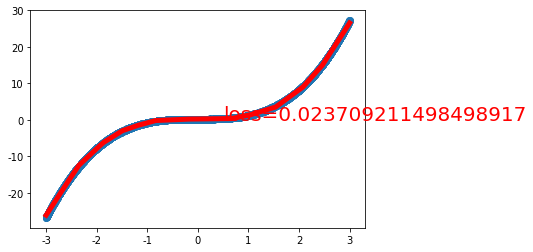

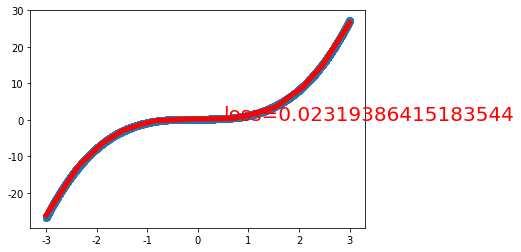

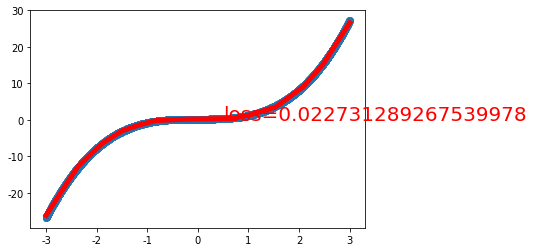

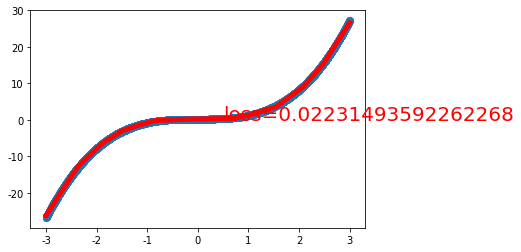

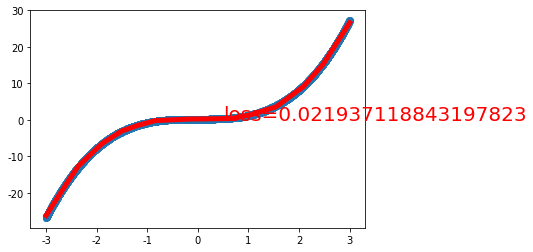

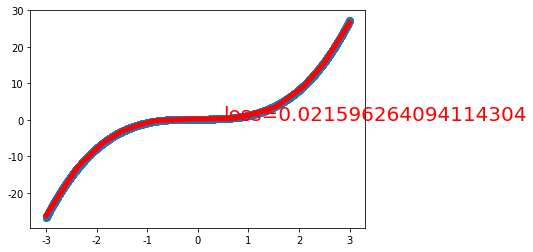

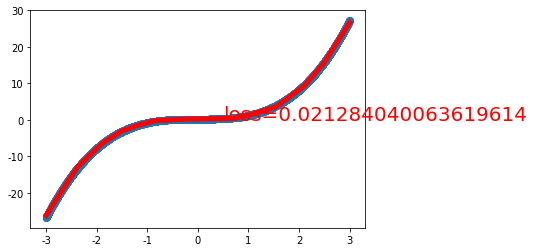

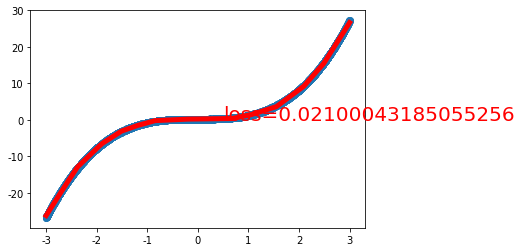

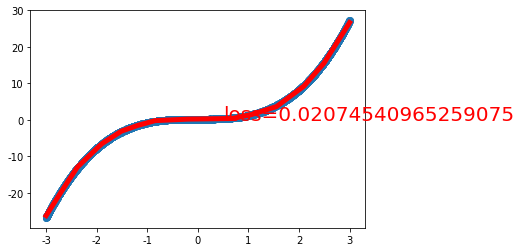

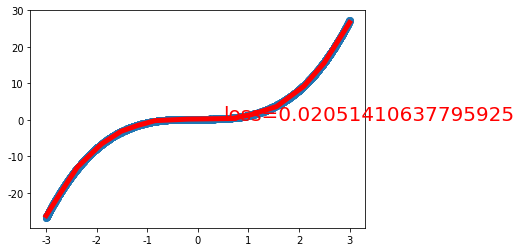

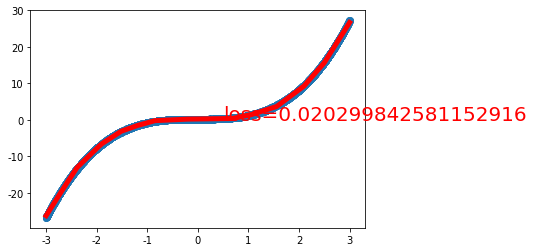

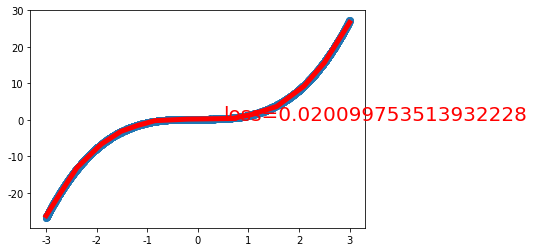

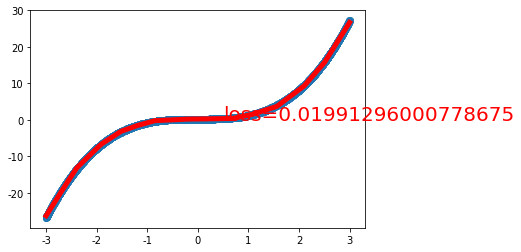

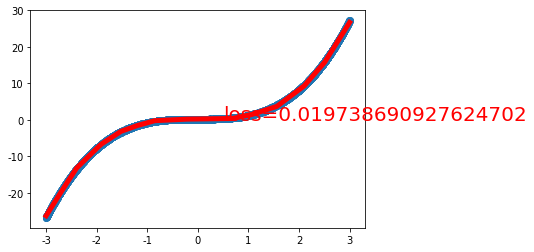

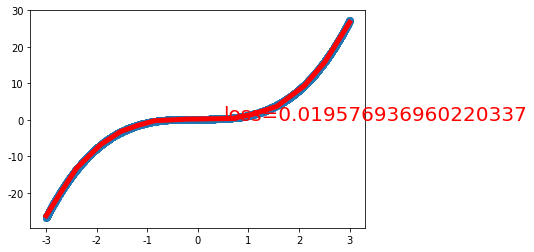

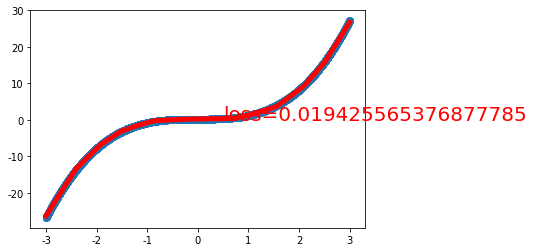

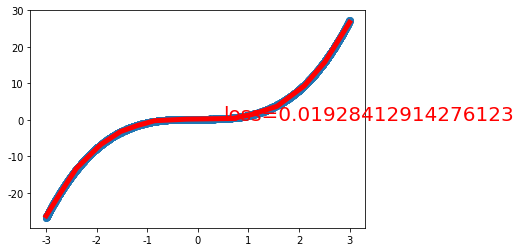

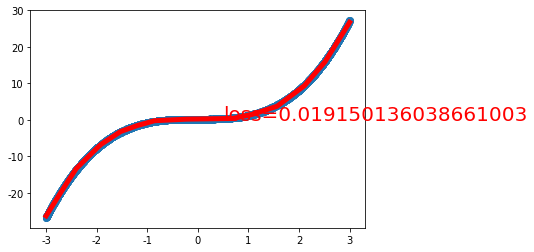

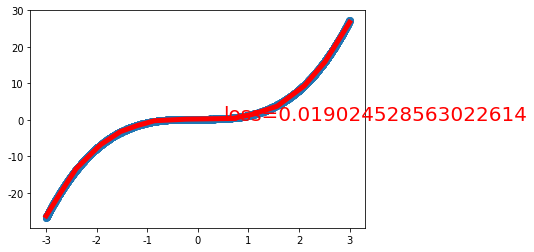

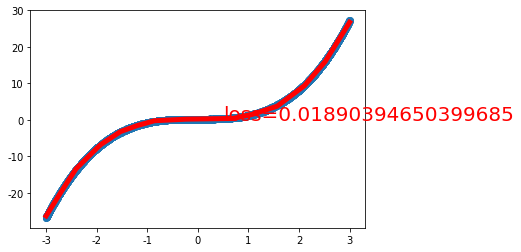

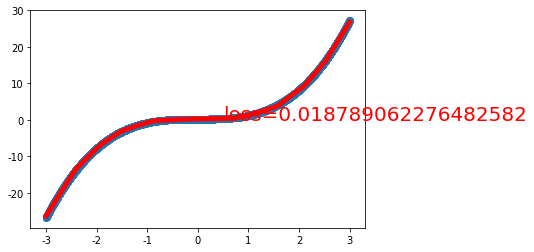

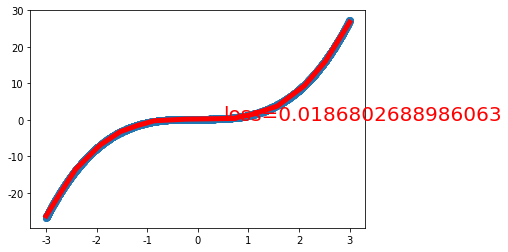

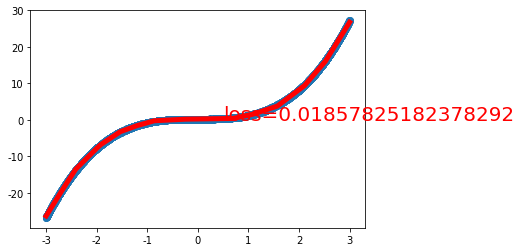

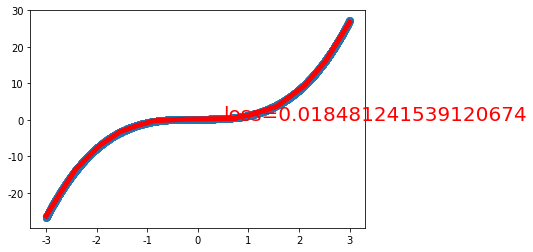

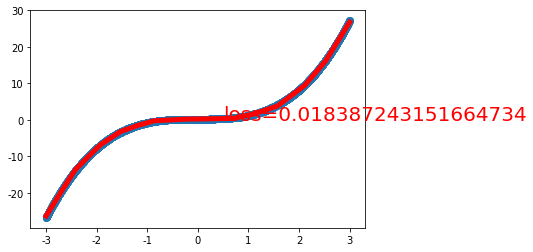

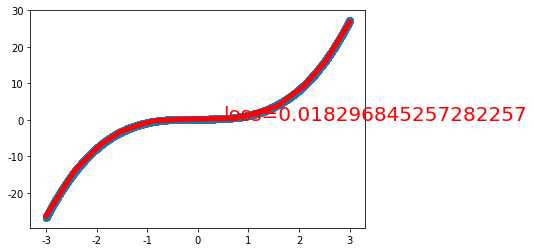

CPU times: user 46.7 s, sys: 1min 7s, total: 1min 54s
Wall time: 1min 15s


In [18]:
%%time
model, loss , output= train(model, inputs, target, 10000)

In [19]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1864],
         [-0.8364],
         [ 0.3527],
         [ 0.9611],
         [-0.8879],
         [ 1.7892],
         [-1.5357],
         [-1.7460],
         [-0.0021],
         [-1.6524],
         [ 1.5827],
         [-0.0727],
         [ 0.3114],
         [ 0.6298],
         [ 1.5497],
         [-0.5659],
         [ 0.5557],
         [-0.4828],
         [ 1.6017],
         [-1.4076]], requires_grad=True), Parameter containing:
 tensor([ 0.3906, -0.2549,  1.0561, -1.0368, -1.0954, -2.8092, -2.3731, -4.2436,
         -0.1019, -1.4461, -1.0852, -0.5976,  0.9323,  0.5417, -3.9061, -1.1640,
         -0.5969, -1.3048, -3.3706, -2.7252], requires_grad=True), Parameter containing:
 tensor([[-2.8397e-01, -6.9899e-01,  4.0340e-01,  1.3640e+00, -1.2975e+00,
           3.2520e+00, -2.6839e+00, -4.4421e+00,  1.4567e-01, -1.9619e+00,
           1.6900e+00, -1.2966e-01,  3.1476e-01,  2.4631e-03,  4.0849e+00,
          -1.1813e+00,  7.7792e-01, -1.3604e+00,  3.5514e